In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
dtrain=pd.read_excel("doc_Train.xlsx")
dtrain.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [3]:
dtrain.shape

(5961, 7)

In [4]:
dtrain.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [5]:
dtrain.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
dtrain.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


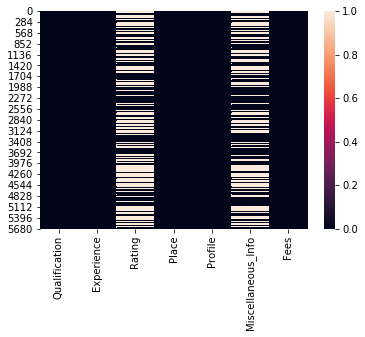

In [7]:
sns.heatmap(dtrain.isnull())

<function matplotlib.pyplot.show(*args, **kw)>

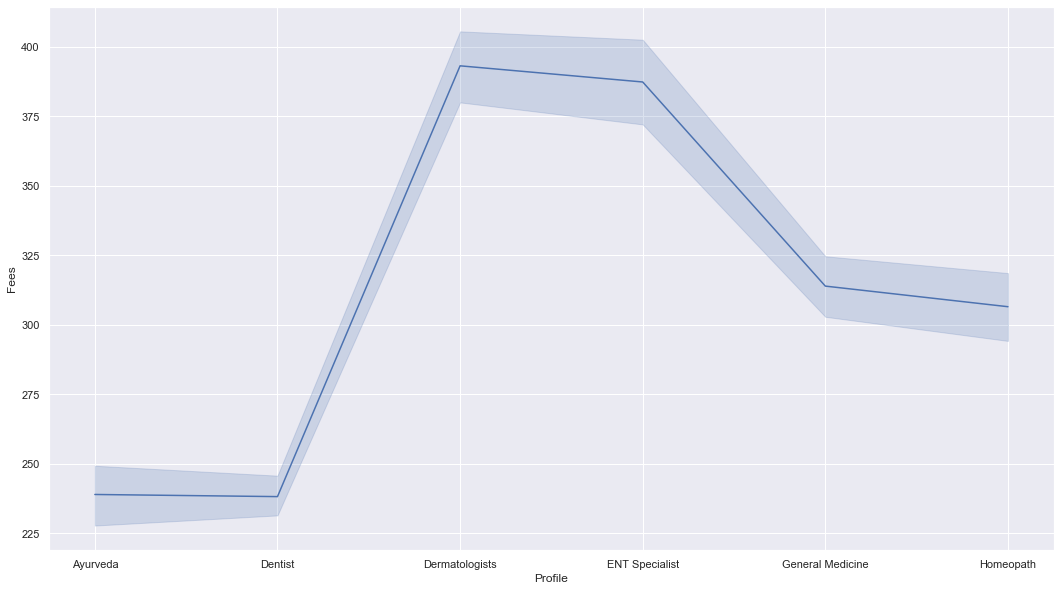

In [8]:
sns.set(rc={"figure.figsize":(18,10)})
sns.lineplot(x="Profile",y="Fees",data=dtrain)
plt.show

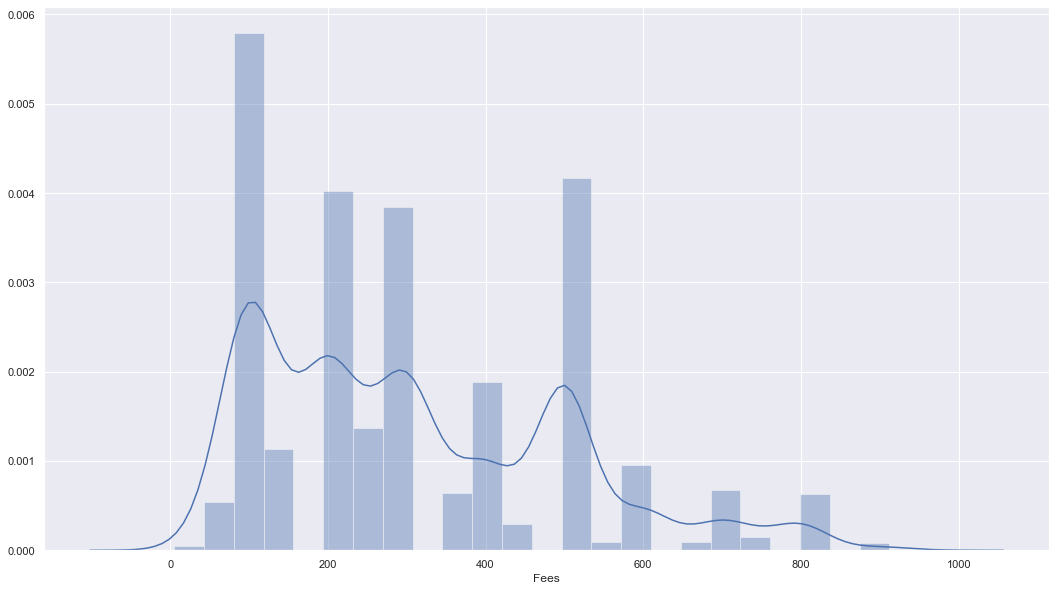

In [9]:
sns.distplot(dtrain['Fees'])

In [10]:
dtest=pd.read_excel("doc_Test.xlsx")
dtest.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [11]:
dtest.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [12]:
doc=pd.concat([dtrain,dtest])
doc.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [13]:
doc.shape

(7948, 7)

In [14]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
Experience            7948 non-null object
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


In [15]:
#EXPERIENCE

doc['Experience']=doc['Experience'].str.split()
doc['Experience']=doc['Experience'].str[0].astype("int")

In [16]:
#Miscellaneous_Info

doc['Miscellaneous_Info']

0                    100% 16 Feedback Kakkanad, Ernakulam
1                   98% 76 Feedback Whitefield, Bangalore
2                                                     NaN
3       Bannerghatta Road, Bangalore ₹250 Available on...
4                   100% 4 Feedback Keelkattalai, Chennai
                              ...                        
1982                                                  NaN
1983                                                  NaN
1984                                                  NaN
1985    RCT - Root Canal Treatment Root Canal Treatmen...
1986                1 Feedback Pallikaranai, Chennai ₹500
Name: Miscellaneous_Info, Length: 7948, dtype: object

In [17]:
#PLACE
doc['Place'].fillna("Unknown,Unknown",inplace=True)
doc['Place']=doc['Place'].str.split(",")
doc['City']=doc['Place'].str[-1]
doc['Place']=doc['Place'].str[0]

In [18]:
#PROFILE
doc['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [19]:
doc['Qualification'].value_counts()

BDS                                                                                                          632
BHMS                                                                                                         627
BAMS                                                                                                         624
MBBS                                                                                                         441
MBBS, MS - ENT                                                                                               280
                                                                                                            ... 
MBBS, DVD, DDV, MD - Dermatology                                                                               1
MDS - Operative Dentistry, BDS                                                                                 1
MBBS, DNB - General Medicine, Fellowship in Diabetology(Johns Hopkins University School of Medic

In [20]:
doc['Qua1']=doc['Qualification'].str.split(',').str[0]

def rep(x):
    if x=='0':
        x=0
    else:
        x=1
        return x
    
doc['Qua1']= doc['Qua1'].apply(lambda x:rep(x))
doc['Qua2']=doc['Qualification'].str.split(',').str[1]
doc['Qua2'].fillna('0',inplace=True)
doc['Qua2']= doc['Qua2'].apply(lambda x:rep(x))
doc['Qua2'].fillna(0,inplace=True)
doc['Qua3']=doc['Qualification'].str.split(',').str[2]
doc['Qua3'].fillna('0',inplace=True)
doc['Qua3']= doc['Qua3'].apply(lambda x:rep(x))
doc['Qua3'].fillna(0,inplace=True)

In [21]:
#RATING

doc['Rating']=doc['Rating'].str.split('%').str[0]

doc['Rating'].fillna('0',inplace=True)

doc['Rating']=doc['Rating'].astype(int)

In [22]:
doc.drop(["Qualification","Miscellaneous_Info"],axis=1,inplace=True)

In [23]:
doc.isnull().sum()

Experience       0
Fees          1987
Place            0
Profile          0
Rating           0
City             0
Qua1             0
Qua2             0
Qua3             0
dtype: int64

In [24]:
doc['Fees'].fillna(doc['Fees'].mean(),inplace=True)
doc['Fees']

0       100.00000
1       350.00000
2       300.00000
3       250.00000
4       250.00000
          ...    
1982    307.94464
1983    307.94464
1984    307.94464
1985    307.94464
1986    307.94464
Name: Fees, Length: 7948, dtype: float64

In [25]:
doc['Fees']=(doc['Fees']-doc['Fees'].min())/(doc['Fees'].max()-doc['Fees'].min())

In [26]:
cat=doc.select_dtypes(include=[np.object])
cat.columns

Index(['Place', 'Profile', 'City'], dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=['Place', 'Profile', 'City']
for val in cat:
    le=LabelEncoder()
    doc[val]=le.fit_transform(doc[val].astype("str"))
doc.dtypes

Experience      int32
Fees          float64
Place           int32
Profile         int32
Rating          int32
City            int32
Qua1            int64
Qua2          float64
Qua3          float64
dtype: object

In [28]:
doc.head()

,Experience,Fees,Place,Profile,Rating,City,Qua1,Qua2,Qua3
0,24,0.100529,324,5,100,4,1,1.0,0.0
1,12,0.365079,926,0,98,0,1,1.0,0.0
2,9,0.312169,494,3,0,0,1,1.0,0.0
3,12,0.259259,74,0,0,0,1,1.0,0.0
4,20,0.259259,367,0,100,1,1,0.0,0.0


In [29]:
X= doc.drop(['Fees'], axis = 1)
print(X.shape)

(7948, 8)


In [30]:
y =doc['Fees'] 
print(y.shape)

(7948,)


In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [33]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=97)
ab=AdaBoostRegressor(random_state=97)
rf=RandomForestRegressor(random_state=97)
gb=GradientBoostingRegressor(random_state=97)

In [34]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [36]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
rmse=[]
for m,model in models:
    print('*********************************',m,'*********************************')
    print('\n',model)
    Model.append(m)
    model.fit(X_train,y_train)
    pre=model.predict(X_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    b=np.sqrt(mse)
    print('RMSE= ',b)
    rmse.append(b)
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.06519806451245869
Mean_Squared_Error = 0.02764555188109749
RMSE=  0.1662695157901697
Cross_Val_Score =  -1.9672395051047322e+29


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -9.539181261453145e-05
Mean_Squared_Error = 0.029576520962146257
RMSE=  0.17197825723662355
Cross_Val_Score =  -0.000991459416781093


********************************* ElasticNet *********************************

 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='c

I Choose GradientBoostingRegressor as my final model because it perform very well on our dataset.RMSE value is low.

R2_score = 0.15101155363472856872148

Mean_Squared_Error = 0.025232463480553788

RMSE=  0.15884729610715376

Cross_Val_Score =  -3.392193789335437e+29


In [37]:
from sklearn.externals import joblib

joblib.dump(gb,'doc_joblib')

['doc_joblib']